In [ ]:
! pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"a0517fbadb8c251d521b847def10336f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d lsind18/gemstones-images

 87% 48.0M/55.2M [00:00<00:00, 59.2MB/s]
100% 55.2M/55.2M [00:00<00:00, 86.2MB/s]


In [ ]:
! unzip /content/gemstones-images.zip

Archive:  /content/gemstones-images.zip
  inflating: test/Alexandrite/alexandrite_18.jpg  
  inflating: test/Alexandrite/alexandrite_28.jpg  
  inflating: test/Alexandrite/alexandrite_3.jpg  
  inflating: test/Alexandrite/alexandrite_6.jpg  
  inflating: test/Almandine/almandine_18.jpg  
  inflating: test/Almandine/almandine_28.jpg  
  inflating: test/Almandine/almandine_3.jpg  
  inflating: test/Almandine/almandine_9.jpg  
  inflating: test/Amazonite/amazonite_18.jpg  
  inflating: test/Amazonite/amazonite_28.jpg  
  inflating: test/Amazonite/amazonite_3.jpg  
  inflating: test/Amazonite/amazonite_8.jpg  
  inflating: test/Amber/amber_18.jpg  
  inflating: test/Amber/amber_28.jpg  
  inflating: test/Amber/amber_3.jpg  
  inflating: test/Amber/amber_9.jpg  
  inflating: test/Amethyst/amethyst_18.jpg  
  inflating: test/Amethyst/amethyst_3.jpg  
  inflating: test/Amethyst/amethyst_5.jpg  
  inflating: test/Amethyst/amethyst_7.jpg  
  inflating: test/Ametrine/ametrine_18.jpg  
  inflatin

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.filterwarnings("ignore",category=FutureWarning)
import os
import random
from keras.preprocessing.image import load_img
import tensorflow as tf
from PIL import Image
import cv2

<function matplotlib.pyplot.show>

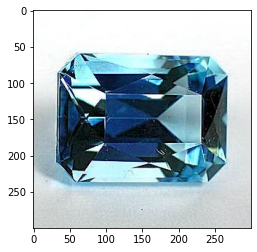

In [ ]:
import matplotlib.pyplot as plt
image = cv2.imread(r'/content/train/Beryl Golden/beryl golden_0.jpg')
plt.imshow(image)
plt.show

In [ ]:
class_names=[]
for i in os.listdir('/content/train'):
    class_names.append(i)
class_names

['Sapphire Yellow',
 'Rhodolite',
 'Zircon',
 'Danburite',
 'Quartz Rose',
 'Cats Eye',
 'Zoisite',
 'Amazonite',
 'Larimar',
 'Quartz Smoky',
 'Serpentine',
 'Chrysocolla',
 'Diamond',
 'Variscite',
 'Sodalite',
 'Benitoite',
 'Aventurine Yellow',
 'Opal',
 'Jade',
 'Spodumene',
 'Bloodstone',
 'Moonstone',
 'Bixbite',
 'Pyrope',
 'Chrome Diopside',
 'Lapis Lazuli',
 'Diaspore',
 'Quartz Lemon',
 'Chrysoprase',
 'Spessartite',
 'Rhodonite',
 'Labradorite',
 'Aquamarine',
 'Kyanite',
 'Malachite',
 'Spinel',
 'Onyx Black',
 'Tsavorite',
 'Sphene',
 'Aventurine Green',
 'Ametrine',
 'Sapphire Purple',
 'Sunstone',
 'Ruby',
 'Hessonite',
 'Blue Lace Agate',
 'Chalcedony',
 'Tourmaline',
 'Chalcedony Blue',
 'Amber',
 'Chrysoberyl',
 'Almandine',
 'Hiddenite',
 'Coral',
 'Onyx Red',
 'Sapphire Blue',
 'Emerald',
 'Jasper',
 'Garnet Red',
 'Pearl',
 'Prehnite',
 'Alexandrite',
 'Topaz',
 'Carnelian',
 'Tigers Eye',
 'Grossular',
 'Andalusite',
 'Kunzite',
 'Iolite',
 'Beryl Golden',
 'Peri

In [ ]:
folders = glob('/content/train/*')
print(len(folders))

87


In [ ]:
train = '/content/train'
test= '/content/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 2856 images belonging to 87 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 363 images belonging to 87 classes.


# **Building Model**

In [ ]:
cnn = tf.keras.models.Sequential()

# **Building Convolution Networks**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

# **Hidden Layer**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=87,activation='softmax'))

In [ ]:
cnn.compile(optimizer="rmsprop",
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [ ]:
cnn.fit(x=training_set,
        validation_data=test_set,
        epochs=30)

Epoch 1/30
90/90 [==============================] - 54s 466ms/step - loss: 5.2784 - accuracy: 0.0777 - val_loss: 3.8640 - val_accuracy: 0.0964
Epoch 2/30
90/90 [==============================] - 42s 466ms/step - loss: 2.8870 - accuracy: 0.2595 - val_loss: 2.5115 - val_accuracy: 0.3719
Epoch 3/30
90/90 [==============================] - 42s 465ms/step - loss: 2.2204 - accuracy: 0.3911 - val_loss: 2.4623 - val_accuracy: 0.3223
Epoch 4/30
90/90 [==============================] - 42s 471ms/step - loss: 1.8220 - accuracy: 0.4772 - val_loss: 1.9700 - val_accuracy: 0.5041
Epoch 5/30
90/90 [==============================] - 43s 473ms/step - loss: 1.5682 - accuracy: 0.5494 - val_loss: 2.3237 - val_accuracy: 0.4050
Epoch 6/30
90/90 [==============================] - 43s 476ms/step - loss: 1.3818 - accuracy: 0.6001 - val_loss: 1.9145 - val_accuracy: 0.5069
Epoch 7/30
90/90 [==============================] - 43s 473ms/step - loss: 1.2583 - accuracy: 0.6394 - val_loss: 1.7209 - val_accuracy: 0.5482

In [22]:
training_set.class_indices

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5,
 'Andalusite': 6,
 'Andradite': 7,
 'Aquamarine': 8,
 'Aventurine Green': 9,
 'Aventurine Yellow': 10,
 'Benitoite': 11,
 'Beryl Golden': 12,
 'Bixbite': 13,
 'Bloodstone': 14,
 'Blue Lace Agate': 15,
 'Carnelian': 16,
 'Cats Eye': 17,
 'Chalcedony': 18,
 'Chalcedony Blue': 19,
 'Chrome Diopside': 20,
 'Chrysoberyl': 21,
 'Chrysocolla': 22,
 'Chrysoprase': 23,
 'Citrine': 24,
 'Coral': 25,
 'Danburite': 26,
 'Diamond': 27,
 'Diaspore': 28,
 'Dumortierite': 29,
 'Emerald': 30,
 'Fluorite': 31,
 'Garnet Red': 32,
 'Goshenite': 33,
 'Grossular': 34,
 'Hessonite': 35,
 'Hiddenite': 36,
 'Iolite': 37,
 'Jade': 38,
 'Jasper': 39,
 'Kunzite': 40,
 'Kyanite': 41,
 'Labradorite': 42,
 'Lapis Lazuli': 43,
 'Larimar': 44,
 'Malachite': 45,
 'Moonstone': 46,
 'Morganite': 47,
 'Onyx Black': 48,
 'Onyx Green': 49,
 'Onyx Red': 50,
 'Opal': 51,
 'Pearl': 52,
 'Peridot': 53,
 'Prehnite': 54,
 'Pyrite': 5

In [85]:
from keras.preprocessing import image
test_image = image.load_img(r'/content/train/Hiddenite/hiddenite_0.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)  #we have to expand the dimesnions so that it is same as in convolution layer
# as we have to flatten it we are writing axis=0
result = cnn.predict(test_image)

In [86]:
result = result.flatten().astype('int')
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [87]:
names=[]
for name in os.listdir('/content/train'):
    names.append(name) 
names=sorted(names)

In [88]:
for i in range(0,87):
    if result[i]==1:
       print(i)
       print(names[i])     

36
Hiddenite


In [89]:
! pip install gradio

     |████████████████████████████████| 898 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 36.1 MB/s 
     |████████████████████████████████| 210 kB 45.4 MB/s 
     |████████████████████████████████| 961 kB 38.2 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 3.6 MB 38.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=465e47ac0512b18ae05108eb59de40076ee71b82f4651e8eb5705af45165fe76
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=9c2a3c7cf46a5ad6d700e17acb5c13e6c8e69b3babb4f88ee4f6b168b6f40aa6
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [90]:
import gradio as gr
def gem_indentify(image):
  img=image.reshape(-1,224,224,3)
  pred=cnn.predict(img)[0]
  return {names[i]: float(pred[i]) for i in range(87)}

In [91]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=87)

In [92]:
gr.Interface(fn=gem_indentify, inputs=image, outputs=label,interpretation='default').launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://34472.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://34472.gradio.app')